<a href="https://colab.research.google.com/github/hafizbudi/active-learning/blob/main/Digits_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DIGITS Active Learning**

## **Connect to google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd gdrive/My Drive/Project/active_learning

## **Install modAL framework**

In [ ]:
pip install modal

## **Load library and digits data**

Digits collected from sklearn

In [ ]:
import numpy as np
import csv
import pandas as pd

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from IPython import display
from matplotlib import pyplot as plt

## Set initial data and split data set

In [ ]:
initial_data = 500

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=initial_data, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

1347
450


## Active learner initialization
Using random forest for estimator and uncertainty sampling for query strategy

In [ ]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

Set the query number

In [ ]:
n_queries = 50

In [ ]:
accuracy_scores = [learner.score(X_test, y_test)]
print("Accuracy initial : ", accuracy_scores[0])

Accuracy initial :  0.9488888888888889


## Active learning loop

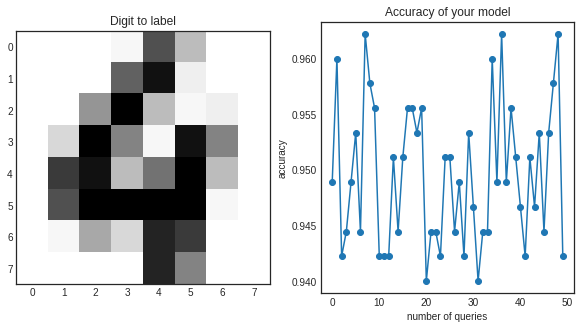

Which digit is this?


In [ ]:
accuracy_scores = [learner.score(X_test, y_test)]

for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(8, 8))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        
    print("Which digit is this?")
    #y_new = np.array([int(input())], dtype=int)
    y_new = np.array([int(y_pool[query_idx])],dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))

## Accuracy visualization

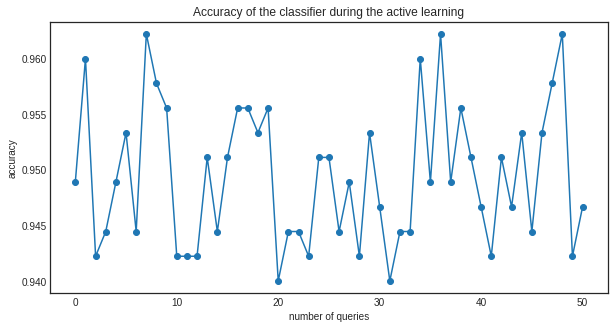

accuracy max :  0.9622222222222222
accuracy min :  0.94


In [ ]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(n_queries+1), accuracy_scores)
    plt.scatter(range(n_queries+1), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    plt.show()

max_acc = max(accuracy_scores)
min_acc = min(accuracy_scores)

print ("accuracy max : ",max_acc)
print ("accuracy min : ",min_acc)

## Save result to pandas

no, instance, acc_initial, acc_min, acc_max


In [ ]:
headerList = ['instance','acc_initial','acc_min','acc_max']

with open('accuracy_result.csv', mode='w') as accuracy_result:
    accuracy_writer = csv.writer(accuracy_result, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    dw = csv.DictWriter(accuracy_result, delimiter=',', 
                        fieldnames=headerList)
    dw.writeheader()
    accuracy_writer.writerow([initial_data, accuracy_scores[0],min_acc,max_acc])



In [ ]:
with open('accuracy_result.csv', mode='a') as accuracy_result:
    accuracy_writer = csv.writer(accuracy_result, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    accuracy_writer.writerow([initial_data, accuracy_scores[0],min_acc,max_acc])

In [ ]:
df = pd.read_csv('accuracy_result.csv')
print(df)

   instance  acc_initial   acc_min   acc_max
0       100     0.971111  0.964444  0.977778
1       100     0.973333  0.964444  0.982222
2       100     0.973333  0.966667  0.975556
3       100     0.968889  0.966667  0.980000
4       100     0.966667  0.966667  0.982222
5       500     0.953333  0.942222  0.975556


In [ ]:
import numpy as np
proba = np.array([[0.1 , 0.85, 0.05],
                  [0.6 , 0.3 , 0.1 ],
                  [0.39, 0.61, 0.0 ]])
1-proba.max(axis=0)

array([0.4 , 0.15, 0.9 ])